In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from glob import glob

%matplotlib inline

In [3]:
FREQ = 1.0
T0 = 1 / FREQ
AMP = 20
d_N = 2.0 # Amplitude per step
print(f"FREQ = {FREQ:.4f}, T0 = {T0:.4f}, d_N = {d_N:.4f}")

dt = 1e-3
n_points = round(T0 / dt + 1)

print(F"n_points = {n_points}")


FREQ = 1.0000, T0 = 1.0000, d_N = 2.0000
n_points = 1001


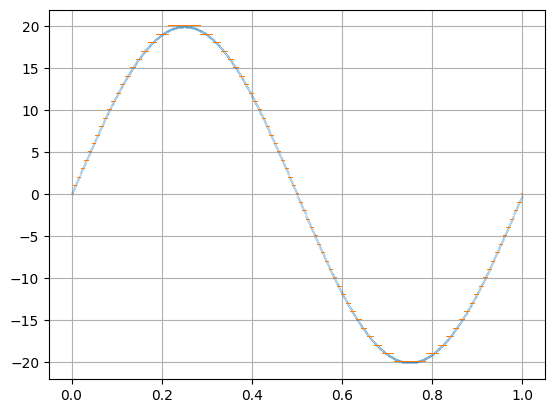

In [35]:
t_axis = np.linspace(0, T0, n_points)
sin = AMP * np.sin(2 * np.pi * FREQ * t_axis)
plt.plot(t_axis, sin, '.', ms=0.3)
sin_round = [round(s) for s in sin]
plt.plot(t_axis, sin_round, ',', ms=0.3)
plt.grid()
pass

# Find Transition Times

In [73]:
t_jump = [0.0]
i_jump = [0]
sin_last = sin_round[0]
for (i, t) in enumerate(t_axis):
    if sin_round[i] != sin_last:
        i_jump.append(i)
        t_jump.append(t)
        sin_last = sin_round[i]
i_jump = np.array(i_jump)
print(repr(i_jump))
t_jump = np.array(t_jump)
print(repr(t_jump))
t_jump_ms = np.array([round(1e3 * t) for t in t_jump], dtype='int')
print(repr(t_jump_ms))
dt_jump = t_jump_ms[1:] - t_jump_ms[:-1]
dt_jump

array([  0,   4,  12,  20,  28,  37,  45,  53,  62,  70,  79,  88,  98,
       108, 118, 130, 142, 155, 170, 188, 215, 286, 313, 331, 346, 359,
       371, 383, 393, 403, 413, 422, 431, 439, 448, 456, 464, 473, 481,
       489, 497, 504, 512, 520, 528, 537, 545, 553, 562, 570, 579, 588,
       598, 608, 618, 630, 642, 655, 670, 688, 715, 786, 813, 831, 846,
       859, 871, 883, 893, 903, 913, 922, 931, 939, 948, 956, 964, 973,
       981, 989, 997])
array([0.   , 0.004, 0.012, 0.02 , 0.028, 0.037, 0.045, 0.053, 0.062,
       0.07 , 0.079, 0.088, 0.098, 0.108, 0.118, 0.13 , 0.142, 0.155,
       0.17 , 0.188, 0.215, 0.286, 0.313, 0.331, 0.346, 0.359, 0.371,
       0.383, 0.393, 0.403, 0.413, 0.422, 0.431, 0.439, 0.448, 0.456,
       0.464, 0.473, 0.481, 0.489, 0.497, 0.504, 0.512, 0.52 , 0.528,
       0.537, 0.545, 0.553, 0.562, 0.57 , 0.579, 0.588, 0.598, 0.608,
       0.618, 0.63 , 0.642, 0.655, 0.67 , 0.688, 0.715, 0.786, 0.813,
       0.831, 0.846, 0.859, 0.871, 0.883, 0.893, 0.903,

array([ 4,  8,  8,  8,  9,  8,  8,  9,  8,  9,  9, 10, 10, 10, 12, 12, 13,
       15, 18, 27, 71, 27, 18, 15, 13, 12, 12, 10, 10, 10,  9,  9,  8,  9,
        8,  8,  9,  8,  8,  8,  7,  8,  8,  8,  9,  8,  8,  9,  8,  9,  9,
       10, 10, 10, 12, 12, 13, 15, 18, 27, 71, 27, 18, 15, 13, 12, 12, 10,
       10, 10,  9,  9,  8,  9,  8,  8,  9,  8,  8,  8])

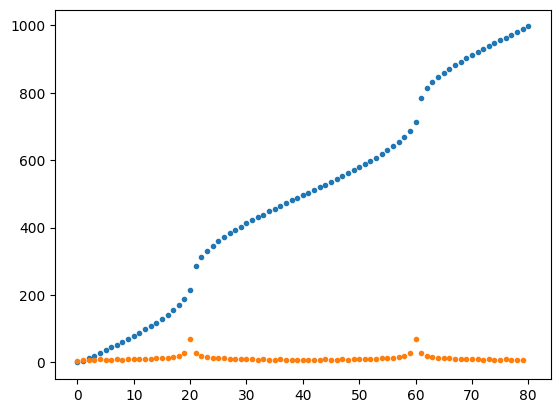

In [74]:
plt.plot(t_jump_ms, '.')
plt.plot(dt_jump, '.')

In [126]:
a = [1 if (sin_round[i_jump[i]] < sin_round[i_jump[i+1]]) else -1 for i in range(len(i_jump)-1)]
a.append(1)
step = np.array(a)
step

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

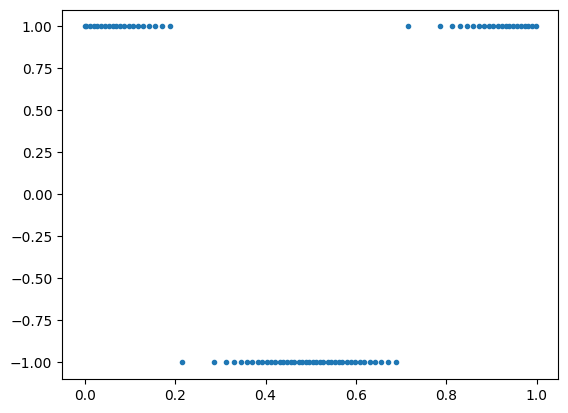

In [132]:
plt.plot(t_jump, step, '.')

In [133]:
len(dt_jump)

80

In [106]:
i=79
-1 if (sin_round[i_jump[i]] < sin_round[i_jump[i+1]]) else 1

-1

In [103]:
(len(sin_round),len(i_jump))

(1001, 81)

In [104]:
i_jump

array([  0,   4,  12,  20,  28,  37,  45,  53,  62,  70,  79,  88,  98,
       108, 118, 130, 142, 155, 170, 188, 215, 286, 313, 331, 346, 359,
       371, 383, 393, 403, 413, 422, 431, 439, 448, 456, 464, 473, 481,
       489, 497, 504, 512, 520, 528, 537, 545, 553, 562, 570, 579, 588,
       598, 608, 618, 630, 642, 655, 670, 688, 715, 786, 813, 831, 846,
       859, 871, 883, 893, 903, 913, 922, 931, 939, 948, 956, 964, 973,
       981, 989, 997])